# ABOUT DIMENTIA AND THE DATASET

Dementia is a syndrome, not a disease. A syndrome is a group of symptoms that doesn’t have a definitive diagnosis. Dementia is a group of symptoms that affects mental cognitive tasks such as memory and reasoning. Dementia is an umbrella term that Alzheimer’s disease can fall under. It can occur due to a variety of conditions, the most common of which is Alzheimer’s disease.

Dementia is the term applied to a group of symptoms that negatively impact memory, but Alzheimer’s is a progressive disease of the brain that slowly causes impairment in memory and cognitive function. The exact cause is unknown and no cure is available.

The World Health Organization Trusted Source says that 47.5 million people around the world are living with dementia.

The time from diagnosis to death can be as little as three years in people over 80 years old. However, it can be much longer for younger people.

Damage to the brain begins years before symptoms appear. Abnormal protein deposits form plaques and tangles in the brain of someone with Alzheimer’s disease. Connections between cells are lost, and they begin to die. In advanced cases, the brain shows significant shrinkage.

It’s impossible to diagnose Alzheimer’s with complete accuracy while a person is alive. The diagnosis can only be confirmed when the brain is examined under a microscope during an autopsy.

Alzheimer’s vs. Dementia symptoms
The symptoms of Alzheimer’s and dementia can overlap, but there can be some differences.

Both conditions can cause:

a decline in the ability to think
memory impairment
communication impairment
The symptoms of Alzheimer’s include:

difficulty remembering recent events or conversations
apathy
depression
impaired judgment
disorientation
confusion
behavioral changes
difficulty speaking, swallowing, or walking in advanced stages of the disease

Attributes:

It consists of 15 attributes which are describes as follows :

Subject.ID - Unique Id of the patient
MRI.ID - Unique Id generated after conducting MRI on patient

✓Group - It is a group of Converted (Previously Normal but developed dimentia later), Demented and Nondemented (Normal Pateints)

✓Visit - Number of visit to detect dementia status

✓MR.Delay - Not Known

Demographics Info
----------------------------

✓M.F - Gender

✓Hand - Handedness 

✓Age - Age in years

✓**EDUC - Years of education**

✓**SES - Socioeconomic status as assessed by the Hollingshead Index of Social 
Position and classified into categories from 1 (highest status) to 5 (lowest status)**

Clinical Info
-----------------

✓**MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)**

✓**CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)**

Derived anatomic volumes
---------------------------------------

✓**eTIV - Estimated total intracranial volume, mm3**

✓**nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process**

✓**ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)**

# IMPORTING LIBRARIES

In [2]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
# from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# import tpot
from sklearn.model_selection import RepeatedStratifiedKFold
# from tpot import TPOTClassifier
from sklearn.model_selection import GridSearchCV
# import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
import seaborn as sns
# import shap 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# import eli5 as eli
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline




















# DATA INPUT

In [3]:

df = pd.read_csv("C:/Users/ASUS/Desktop/DATASETS/dimenti/dementia_dataset.csv")

In [4]:
df

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

# DATA ANALYSIS

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


In [6]:
df.shape



(373, 15)

In [7]:
df.head


<bound method NDFrame.head of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF

In [8]:
df.tail

<bound method NDFrame.tail of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF

In [9]:
df.describe

<bound method NDFrame.describe of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV   

In [10]:
df.info

<bound method DataFrame.info of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    A

In [11]:
df.values


array([['OAS2_0001', 'OAS2_0001_MR1', 'Nondemented', ..., 1987, 0.696,
        0.883],
       ['OAS2_0001', 'OAS2_0001_MR2', 'Nondemented', ..., 2004, 0.681,
        0.876],
       ['OAS2_0002', 'OAS2_0002_MR1', 'Demented', ..., 1678, 0.736,
        1.046],
       ...,
       ['OAS2_0186', 'OAS2_0186_MR1', 'Nondemented', ..., 1319, 0.801,
        1.331],
       ['OAS2_0186', 'OAS2_0186_MR2', 'Nondemented', ..., 1327, 0.796,
        1.323],
       ['OAS2_0186', 'OAS2_0186_MR3', 'Nondemented', ..., 1333, 0.801,
        1.317]], dtype=object)

In [12]:
type(df.values
)

numpy.ndarray

In [13]:
df.index


RangeIndex(start=0, stop=373, step=1)

In [14]:
df.describe

<bound method NDFrame.describe of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV   

In [15]:
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [16]:

#rename attribute
df = df.rename(columns = {'M/F' : 'Gender'})

In [17]:
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
Gender         object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [18]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'Gender', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

# DATA VISUALIZATION AND CLEANING

In [19]:
#BUT I HAVE REPLACED WITH 0 EITHER WAYS

In [20]:
# Plotting distribution of SES
def univariate_mul(var):
    fig = plt.figure(figsize=(16,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(212)
    df[var].plot(kind='hist',ax=ax1, grid=True)
    ax1.set_title('Histogram of '+var, fontsize=14)
    
    ax2=sns.distplot(df[[var]],hist=False)
    ax2.set_title('Distribution of '+ var)
    plt.show()

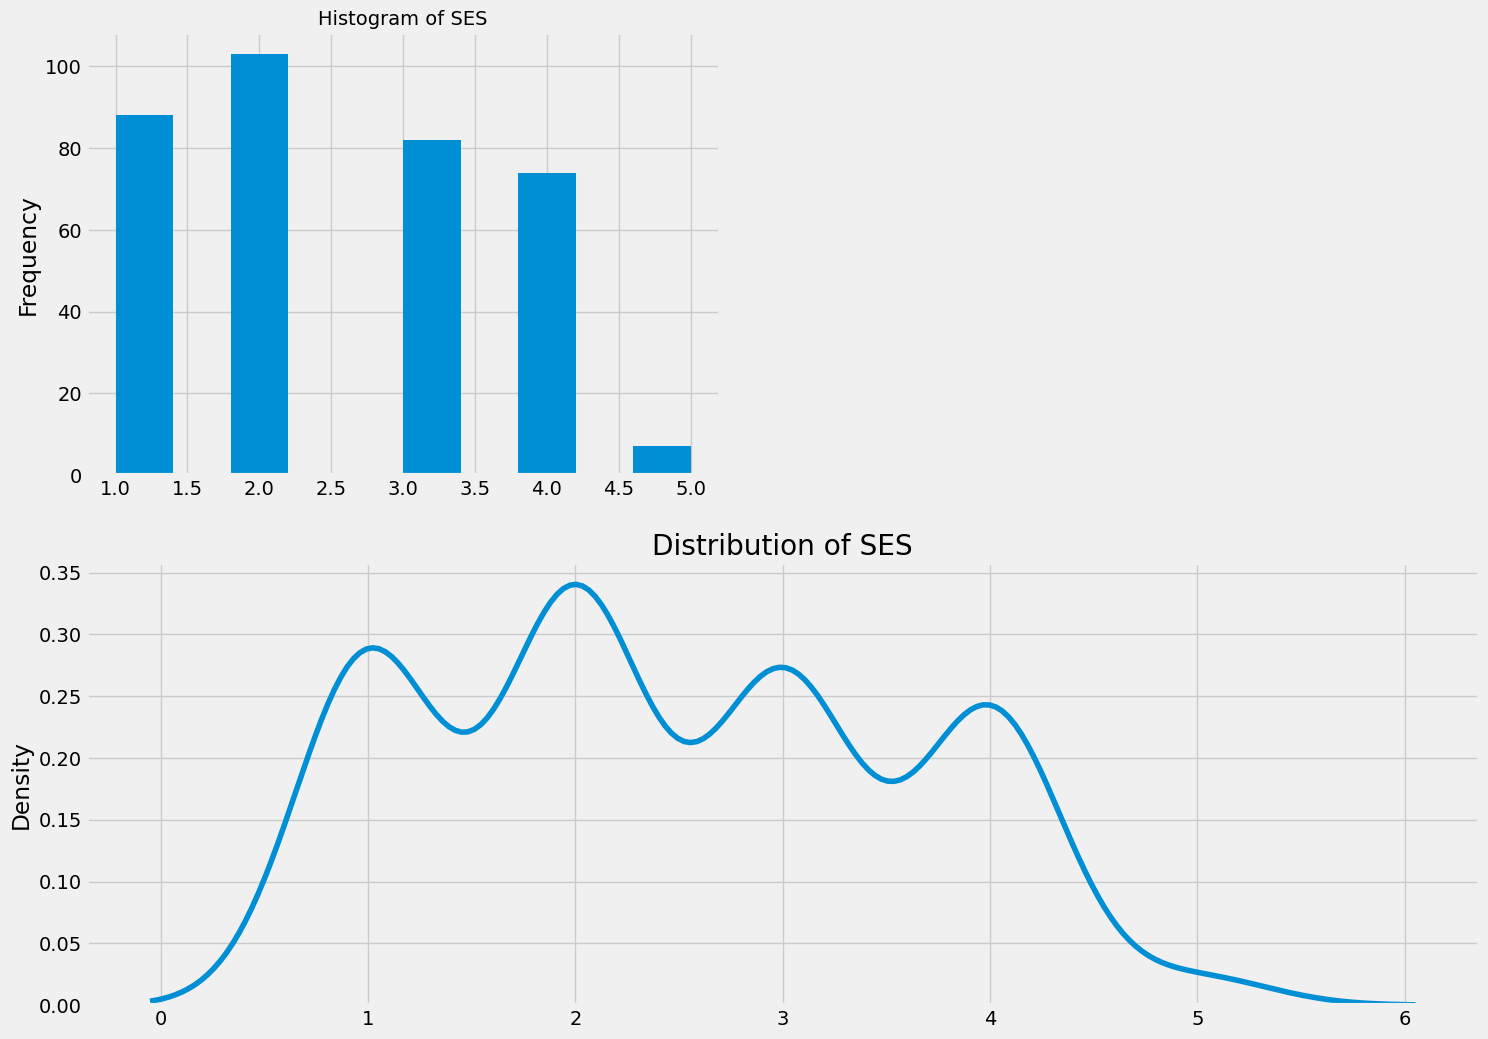

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [21]:
# lets see the distribution of SES to decide which value we can impute in place of missing values.
univariate_mul('SES')
df['SES'].describe()

In [22]:
# # imputing missing value in SES with median
# df['SES'].fillna((df['SES'].median()), inplace=True)

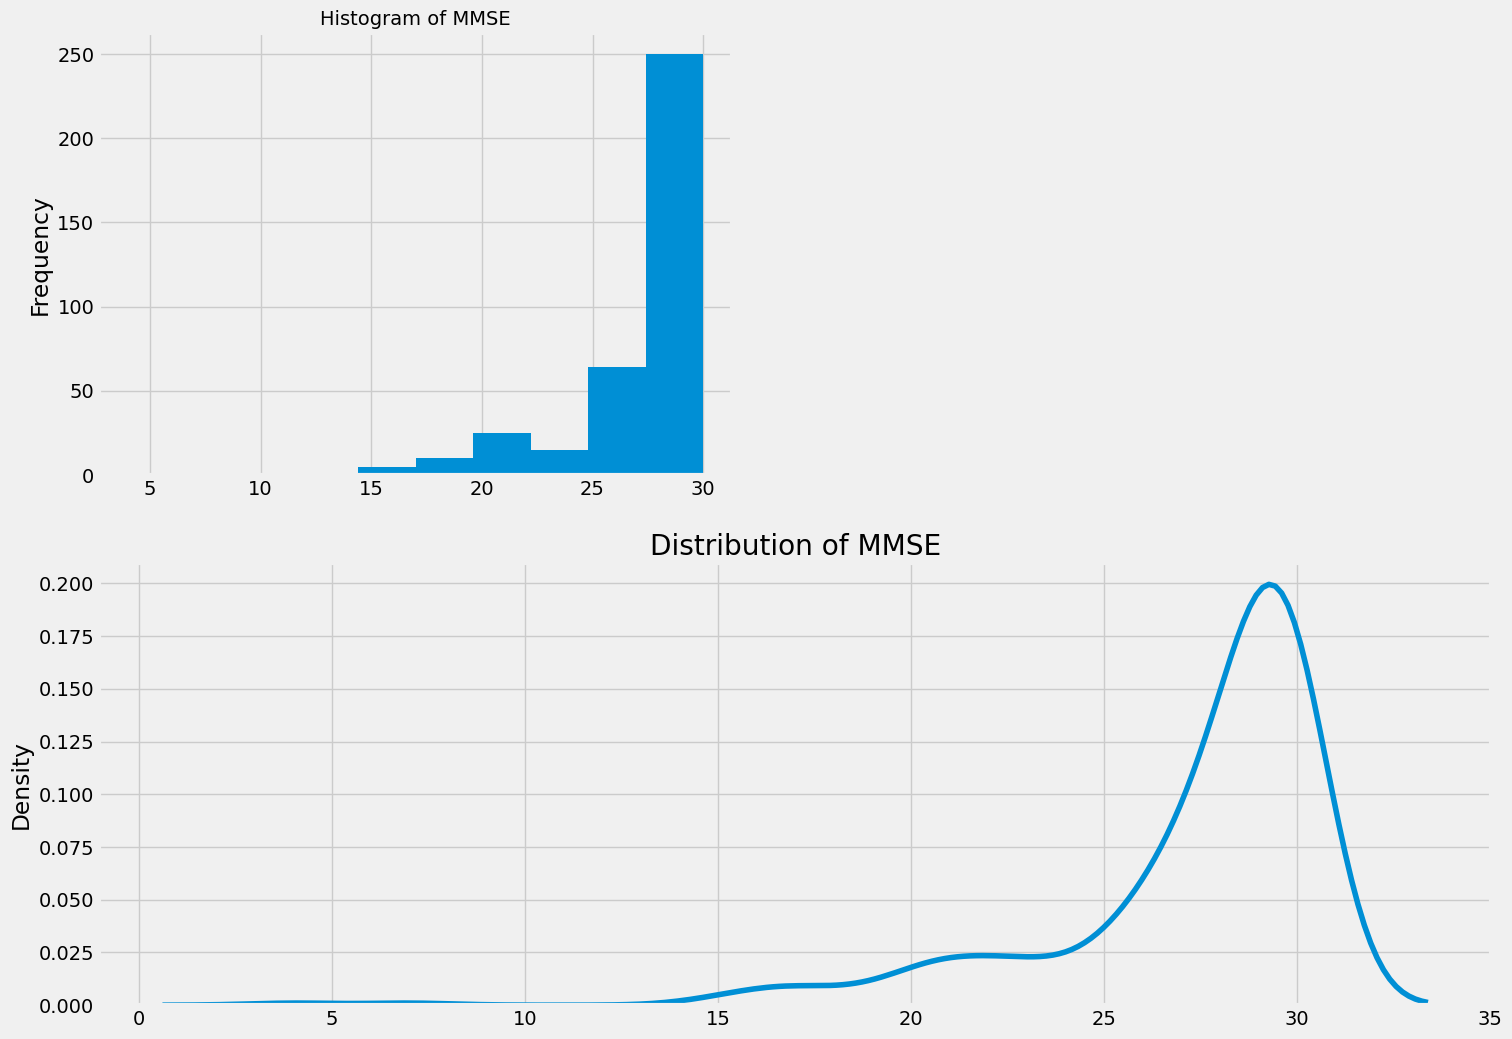

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [23]:
univariate_mul('MMSE')
df['MMSE'].describe()

In [24]:


# Checking unique values 
df.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
Gender          2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

In [25]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
Gender         0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [26]:
# df['SES'].fillna(0)
# df['MMSE'].fillna(0)


In [27]:
df['SES'].fillna ( df['SES'].mode() [0], inplace=True ) # impute mode
# df.Mmse.fillna ( df.Mmse.mean() , inplace=True ) # impute mean
df.isna().sum()



Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
Gender        0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          2
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [28]:
df['MMSE'].fillna ( df['MMSE'].mode() [0], inplace=True )

In [29]:
df['Gender'] = df['Gender'].replace(['F', 'M'], ['1', '0'])

In [30]:
df.drop(columns=['Subject ID', 'MRI ID'], inplace=True) # drop

In [31]:
df

Group  Visit  MR Delay Gender Hand  Age  EDUC  SES  MMSE  CDR  \
0    Nondemented      1         0      0    R   87    14  2.0  27.0  0.0   
1    Nondemented      2       457      0    R   88    14  2.0  30.0  0.0   
2       Demented      1         0      0    R   75    12  2.0  23.0  0.5   
3       Demented      2       560      0    R   76    12  2.0  28.0  0.5   
4       Demented      3      1895      0    R   80    12  2.0  22.0  0.5   
..           ...    ...       ...    ...  ...  ...   ...  ...   ...  ...   
368     Demented      2       842      0    R   82    16  1.0  28.0  0.5   
369     Demented      3      2297      0    R   86    16  1.0  26.0  0.5   
370  Nondemented      1         0      1    R   61    13  2.0  30.0  0.0   
371  Nondemented      2       763      1    R   63    13  2.0  30.0  0.0   
372  Nondemented      3      1608      1    R   65    13  2.0  30.0  0.0   

     eTIV   nWBV    ASF  
0    1987  0.696  0.883  
1    2004  0.681  0.876  
2    1678  0.736  1.046  
3    1738  0.713  1.010  
4    1698  0.701  1.034  
..    ...    ...    ...  
368  1693  0.694  1.037  
369  1688  0.675  1.040  
370  1319  0.801  1.331  
371  1327  0.796  1.323  
372  1333  0.801  1.317  

[373 rows x 13 columns]

In [32]:
# !pip install plotly

In [33]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [34]:
df.columns

Index(['Group', 'Visit', 'MR Delay', 'Gender', 'Hand', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [35]:
xa=['Visit', 'MR Delay', 'Gender', 'Hand', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

In [36]:
# for i in xa:
#     px.histogram(df,x=i,title='', color='Group')

In [37]:
# This helped me cconfirm whether difficulty in walking was an important factor or not. It indeed, is an important factor to consider.


In [38]:
  px.histogram(df,x='Visit',title='', color='Group')

In [39]:
px.histogram(df,x='MR Delay',title='', color='Group')

In [40]:
px.histogram(df,x='Gender',title='', color='Group')

In [41]:
px.histogram(df,x='Hand',title='', color='Group')

In [42]:
px.histogram(df,x='Age',title='', color='Group')

In [43]:
px.histogram(df,x='EDUC',title='', color='Group')

In [44]:
px.histogram(df,x='SES',title='', color='Group')

In [45]:
px.histogram(df,x='CDR',title='', color='Group')

In [46]:
px.histogram(df,x='eTIV',title='', color='Group')

In [47]:

px.histogram(df,x='ASF',title='', color='Group')

In [48]:

# This helped me cconfirm whether difficulty in walking was an important factor or not. It indeed, is an important factor to consider.

px.violin(df,
             x='ASF',
             y='eTIV',
             title='ASF Vs eTIV',
             color='Group')

In [49]:
#from graphs we can drop hand
df.drop(columns=['Hand'], inplace=True) # drop

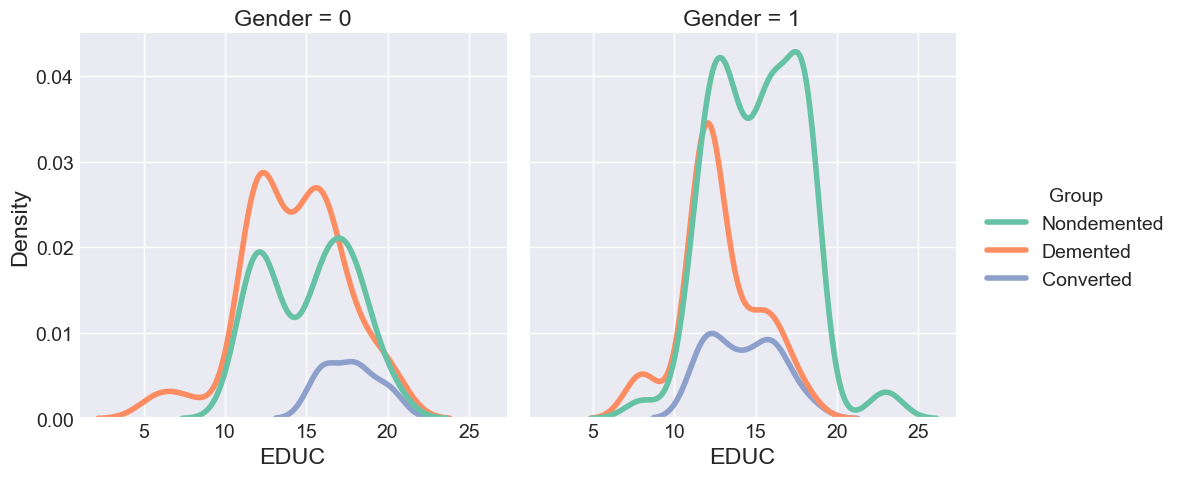

In [50]:
# Visualizing the distribution of Education for each 'Gender' and 'Group'
sns.displot(data=df, x='EDUC', col='Gender', palette='Set2', hue='Group', kind='kde');


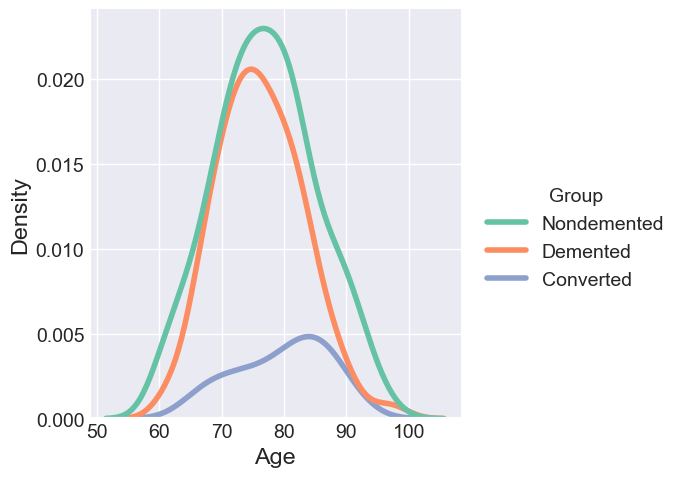

In [51]:
# Visualizing the distribution of 'Age' for each 'Group'
sns.displot(data=df, x='Age', hue='Group', kind="kde", palette='Set2');

In [52]:
# # Plotting distribution of SES
# def univariate_mul(var):
#     fig = plt.figure(figsize=(16,12))
#     cmap=plt.cm.Blues
#     cmap1=plt.cm.coolwarm_r
#     ax1 = fig.add_subplot(221)
#     ax2 = fig.add_subplot(212)
#     df[var].plot(kind='hist',ax=ax1, grid=True)
#     ax1.set_title('Histogram of '+var, fontsize=14)
    
#     ax2=sns.distplot(df[[var]],hist=False)
#     ax2.set_title('Distribution of '+ var)
#     plt.show()

In [53]:
# lets see the distribution of SES to decide which value we can impute in place of missing values.
# univariate_mul('SES')
# df['SES'].describe()

In [54]:
# # imputing missing value in SES with median
# df['SES'].fillna((df['SES'].median()), inplace=True)

In [55]:
# univariate_mul('MMSE')
# df['MMSE'].describe()

In [56]:
# Defining function to create pie chart and bar plot as subplots
def plot_piechart(var):
  plt.figure(figsize=(14,7))
  plt.subplot(121)
  label_list = df[var].unique().tolist()
  df[var].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=label_list,
  wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
  plt.title("Distribution of "+ var +"  variable")

  plt.subplot(122)
  ax = df[var].value_counts().plot(kind="barh")

  for i,j in enumerate(df[var].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

  plt.title("Count of "+ var +" cases")
  plt.show()

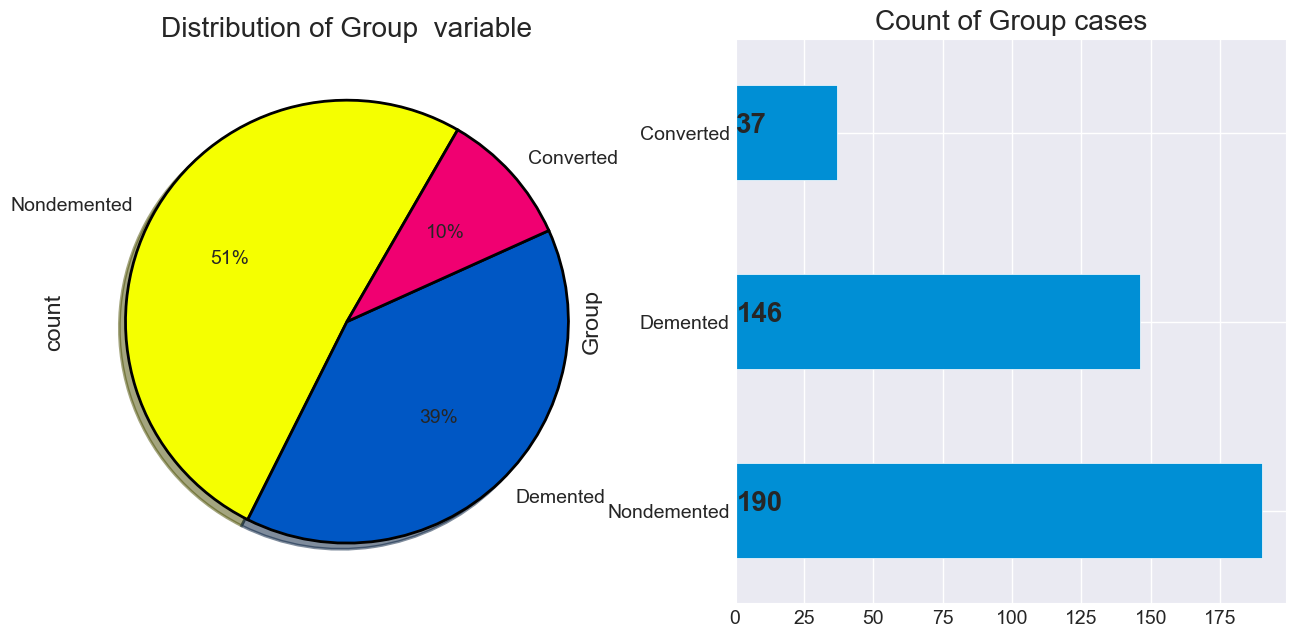

In [57]:
plot_piechart('Group')

<Axes: >

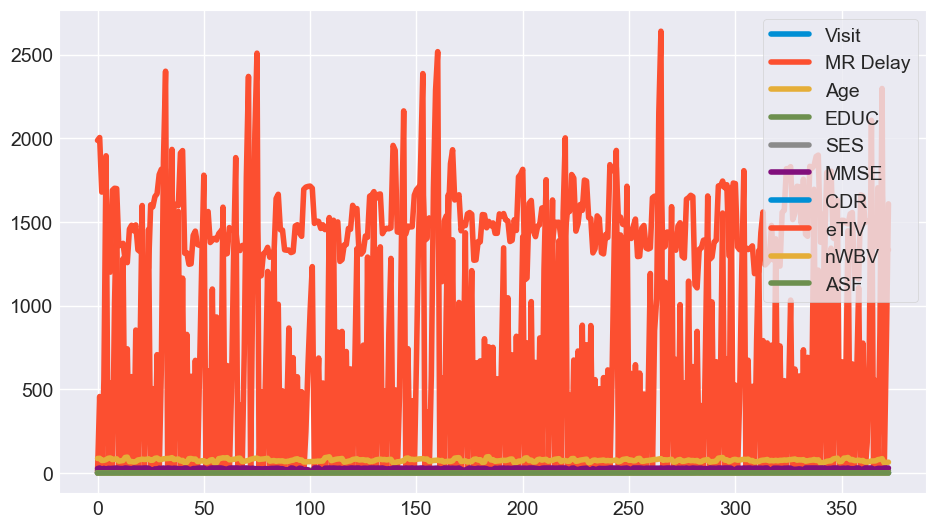

In [58]:

df.plot()

    

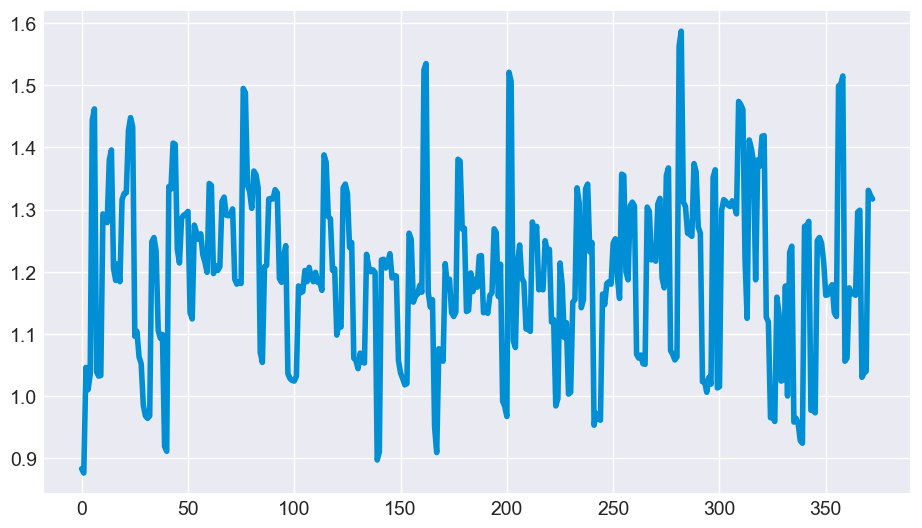

In [59]:
plt.plot(df.index, df['ASF'])

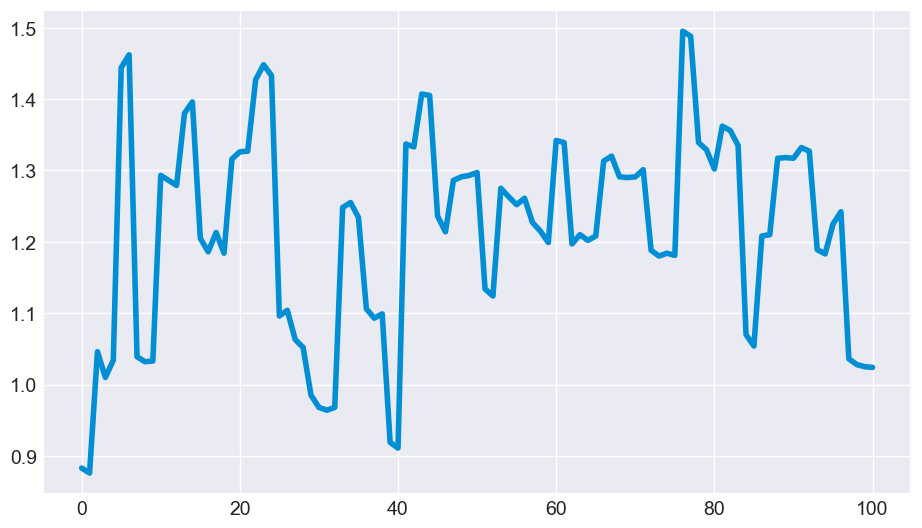

In [60]:
subset = df.iloc[0:101] 
plt.plot(subset.index, subset['ASF'])

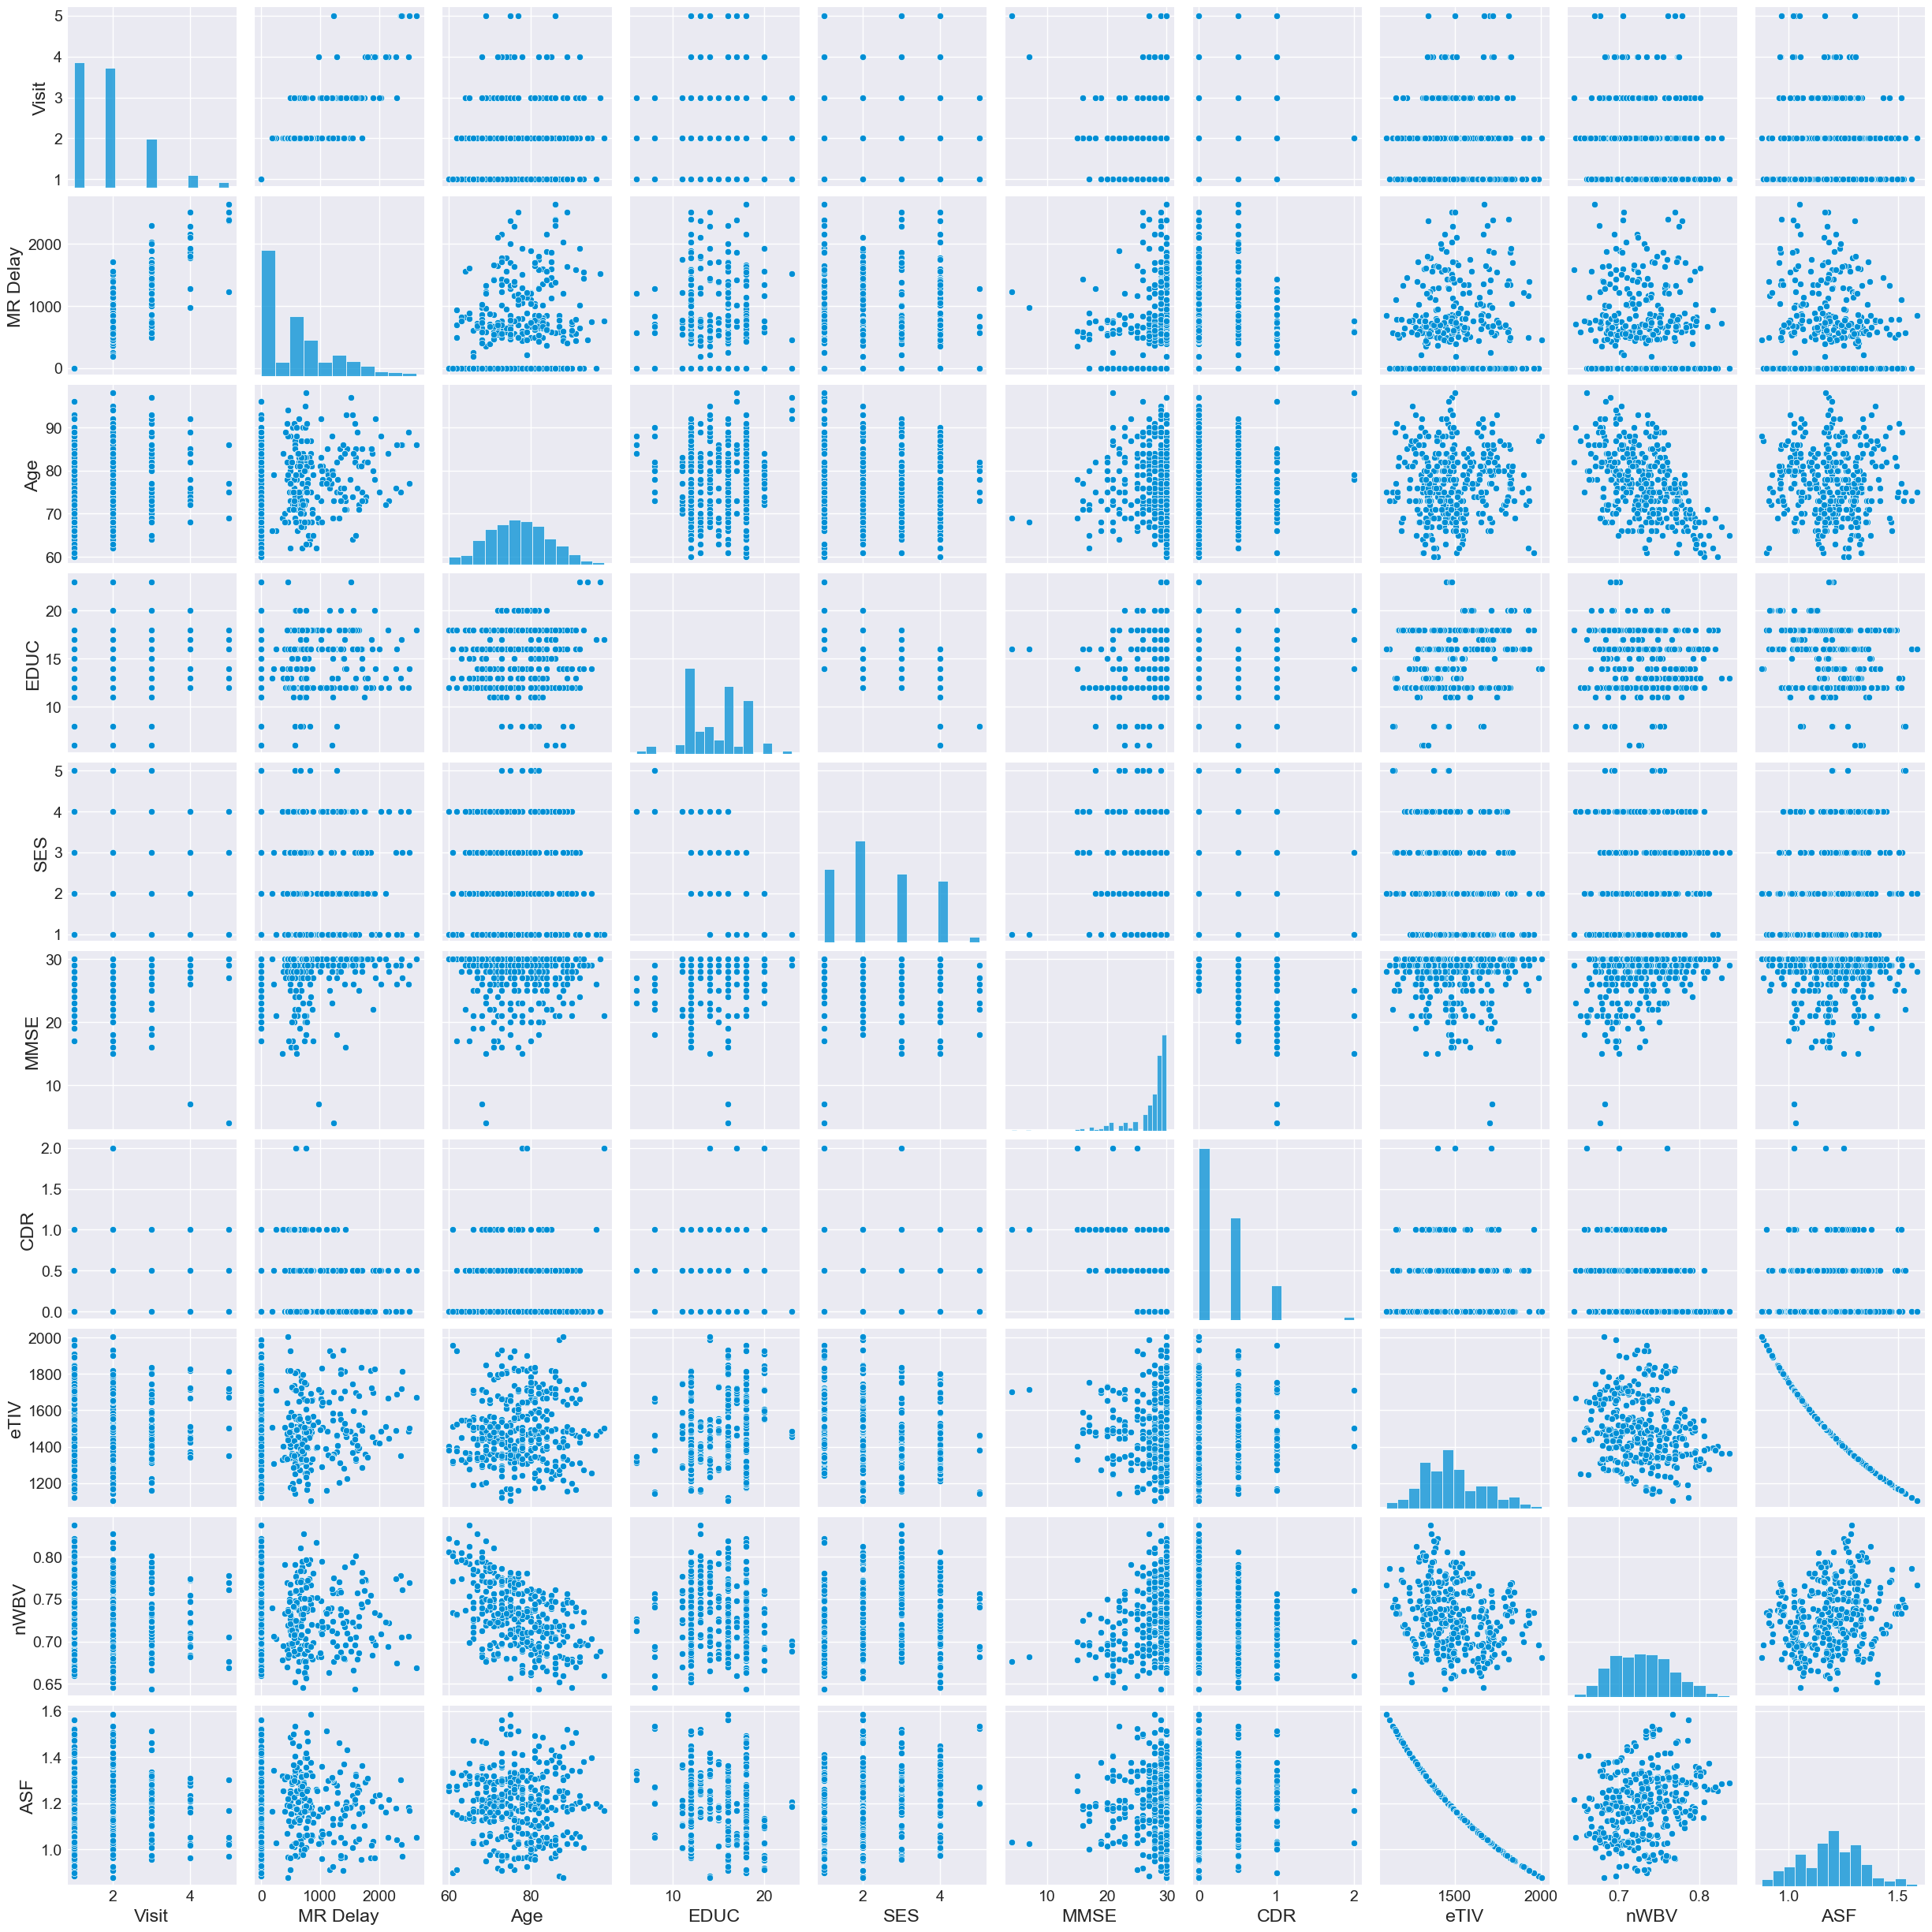

In [61]:
sns.pairplot(df)

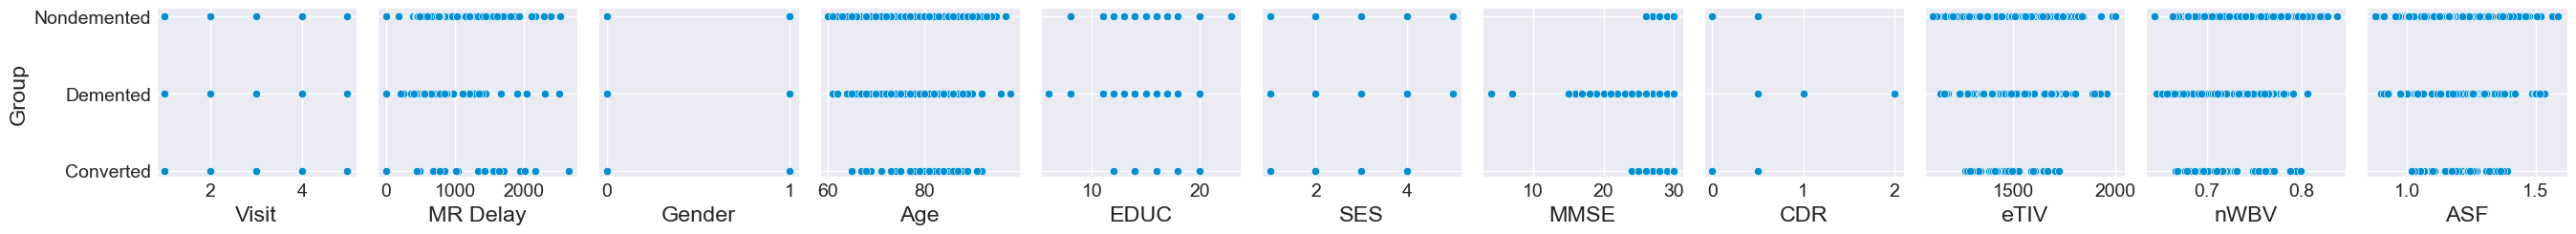

In [62]:
sns.pairplot(df,x_vars=['Visit', 'MR Delay', 'Gender',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],y_vars=['Group'])



<Axes: xlabel='MMSE', ylabel='CDR'>

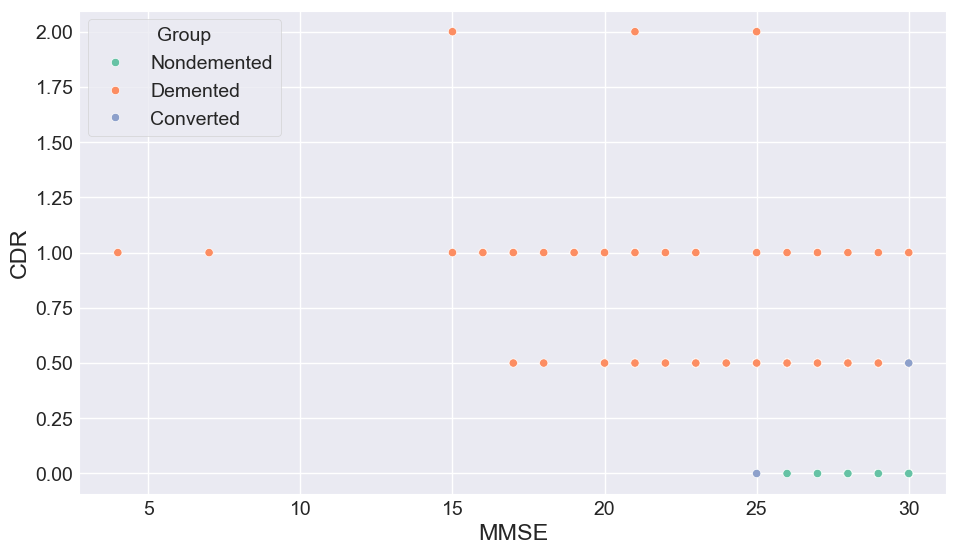

In [63]:
# Visualizing the relationship between 'MMSE' and 'CDR' variables with respect to 'Group'
sns.scatterplot(data=df, x='MMSE', y='CDR', palette='Set2', hue='Group')

<Axes: xlabel='Group', ylabel='count'>

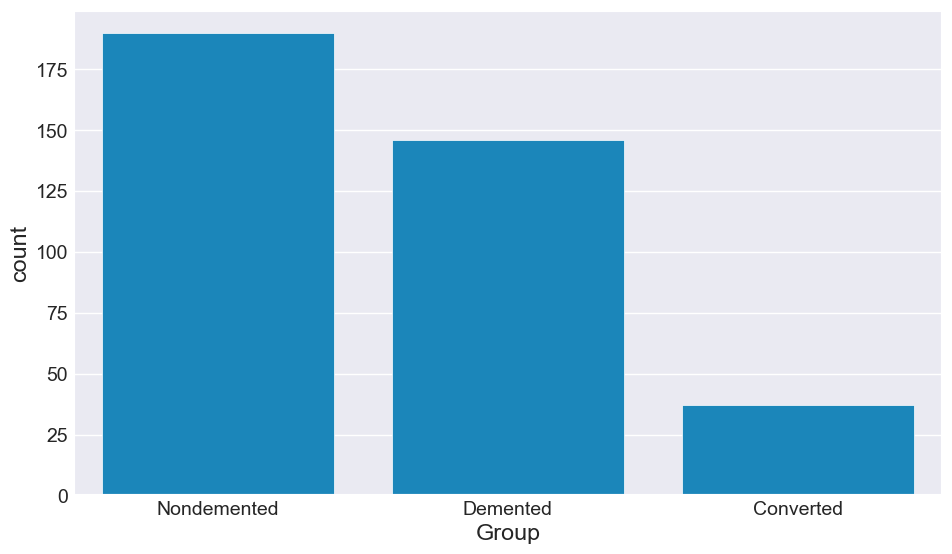

In [64]:
sns.countplot(x = df['Group'])


In [65]:
df.Group.value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

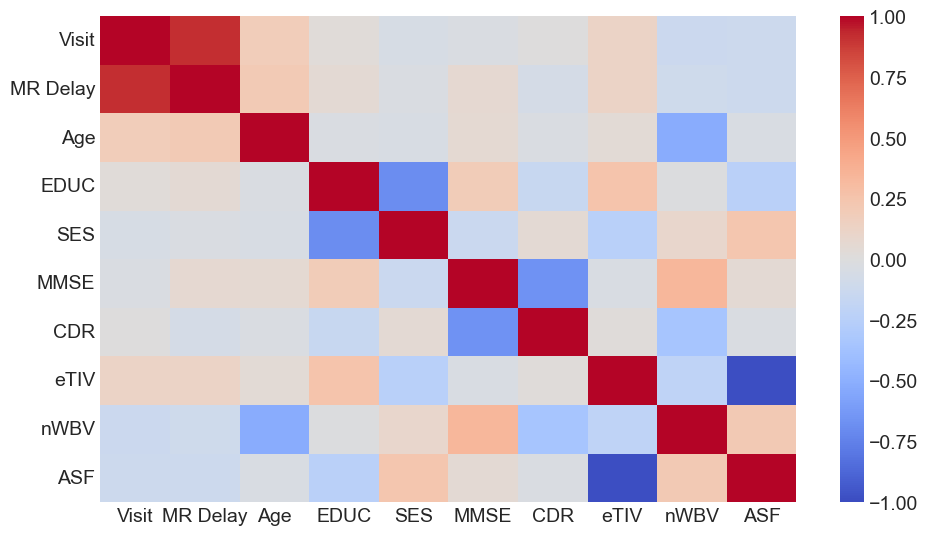

In [66]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, cmap='coolwarm');

In [67]:
# #can be run only after all values are in integer

# df.corr()['Group'].sort_values(ascending = False)

In [68]:
df.groupby('Group')['CDR'].value_counts()

Group        CDR
Converted    0.5     19
             0.0     18
Demented     0.5    102
             1.0     41
             2.0      3
Nondemented  0.0    188
             0.5      2
Name: count, dtype: int64

In [69]:
# #only after all integer

# corr = df.corr ()
# plt.figure ( figsize= (8,6) )
# sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.7, cbar = True, cmap='RdBu' )
# plt.title ( 'Matrix of correlation', size = 16)
# plt.show ()

In [70]:
df

Group  Visit  MR Delay Gender  Age  EDUC  SES  MMSE  CDR  eTIV  \
0    Nondemented      1         0      0   87    14  2.0  27.0  0.0  1987   
1    Nondemented      2       457      0   88    14  2.0  30.0  0.0  2004   
2       Demented      1         0      0   75    12  2.0  23.0  0.5  1678   
3       Demented      2       560      0   76    12  2.0  28.0  0.5  1738   
4       Demented      3      1895      0   80    12  2.0  22.0  0.5  1698   
..           ...    ...       ...    ...  ...   ...  ...   ...  ...   ...   
368     Demented      2       842      0   82    16  1.0  28.0  0.5  1693   
369     Demented      3      2297      0   86    16  1.0  26.0  0.5  1688   
370  Nondemented      1         0      1   61    13  2.0  30.0  0.0  1319   
371  Nondemented      2       763      1   63    13  2.0  30.0  0.0  1327   
372  Nondemented      3      1608      1   65    13  2.0  30.0  0.0  1333   

      nWBV    ASF  
0    0.696  0.883  
1    0.681  0.876  
2    0.736  1.046  
3    0.713  1.010  
4    0.701  1.034  
..     ...    ...  
368  0.694  1.037  
369  0.675  1.040  
370  0.801  1.331  
371  0.796  1.323  
372  0.801  1.317  

[373 rows x 12 columns]

In [71]:
# le = LabelEncoder ()
# data["M/F"] = le.fit_transform (data["M/F"].values)
# data["Group"] = le.fit_transform (data["Group"].values )

In [72]:
# Importing the necessary library for label encoding
from sklearn.preprocessing import LabelEncoder

# Creating an instance of the LabelEncoder class
le = LabelEncoder()

# Encoding the 'Gender' column in the DataFrame
# df.Gender = le.fit_transform(df.Gender.values)

# Printing the mapping of encoded values to original classes for 'Gender'
# print(f'Sex:\n0 : {le.classes_[0]}\n1 : {le.classes_[1]}\n\n')
df["Group"] = le.fit_transform (df["Group"].values )
df["Gender"] = le.fit_transform (df["Gender"].values )

In [73]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder ()
# # df.Sex = le.fit_transform ( df.Sex.values )
# # print ( 'Sex:\n0 : %s \n1 : %s\n\n' %(le.classes_[0], le.classes_[1]) )
# df.Dementia = le.fit_transform ( df.Dementia.values )
# print ( 'Dementia:\n0 : %s \n1 : %s \n2 : %s' %(le.classes_[0], le.classes_[1], le.classes_[2]) )

# df.Dementia = df.Dementia.astype('category')
# df.Sex = df.Sex.astype('category')

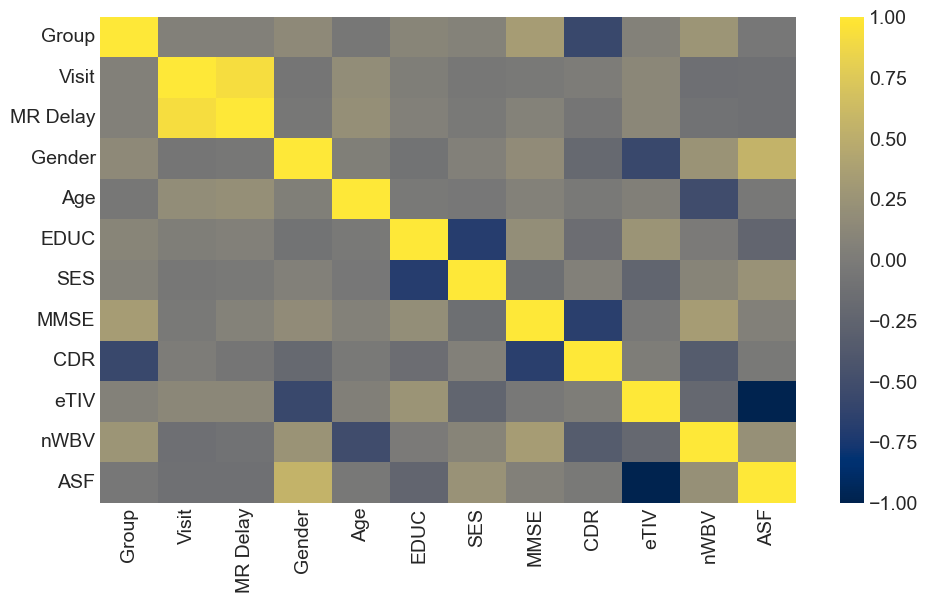

In [74]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, cmap='cividis');

In [75]:
#can be run only after all values are in integer

df.corr()['Group'].sort_values(ascending = False)

Group       1.000000
MMSE        0.337034
nWBV        0.258093
Gender      0.143918
EDUC        0.100606
SES         0.066154
eTIV        0.056693
MR Delay    0.049262
Visit       0.048434
ASF        -0.042848
Age        -0.049267
CDR        -0.572518
Name: Group, dtype: float64

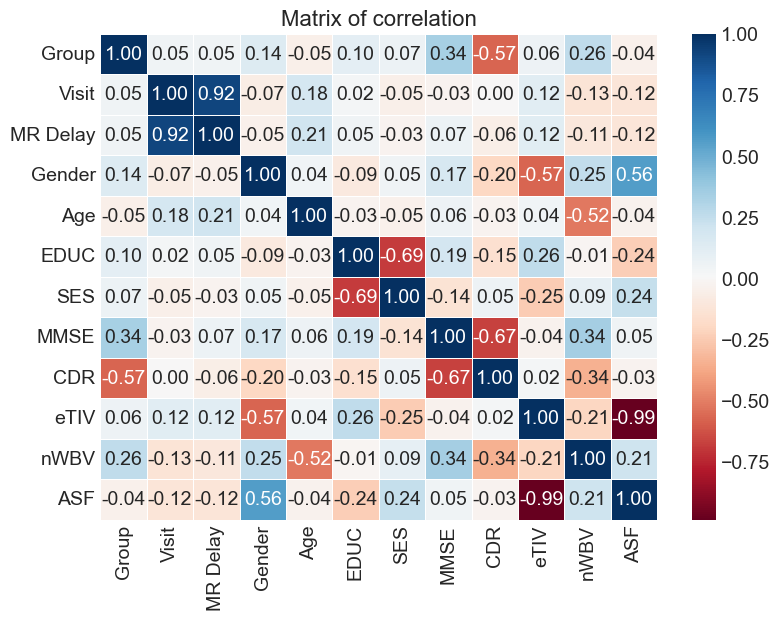

In [76]:
#only after all integer

corr = df.corr ()
plt.figure ( figsize= (8,6) )
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.7, cbar = True, cmap='RdBu' )
plt.title ( 'Matrix of correlation', size = 16)
plt.show ()

In [77]:
df

Group  Visit  MR Delay  Gender  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV  \
0        2      1         0       0   87    14  2.0  27.0  0.0  1987  0.696   
1        2      2       457       0   88    14  2.0  30.0  0.0  2004  0.681   
2        1      1         0       0   75    12  2.0  23.0  0.5  1678  0.736   
3        1      2       560       0   76    12  2.0  28.0  0.5  1738  0.713   
4        1      3      1895       0   80    12  2.0  22.0  0.5  1698  0.701   
..     ...    ...       ...     ...  ...   ...  ...   ...  ...   ...    ...   
368      1      2       842       0   82    16  1.0  28.0  0.5  1693  0.694   
369      1      3      2297       0   86    16  1.0  26.0  0.5  1688  0.675   
370      2      1         0       1   61    13  2.0  30.0  0.0  1319  0.801   
371      2      2       763       1   63    13  2.0  30.0  0.0  1327  0.796   
372      2      3      1608       1   65    13  2.0  30.0  0.0  1333  0.801   

       ASF  
0    0.883  
1    0.876  
2    1.046  
3    1.010  
4    1.034  
..     ...  
368  1.037  
369  1.040  
370  1.331  
371  1.323  
372  1.317  

[373 rows x 12 columns]

In [78]:
df.columns


Index(['Group', 'Visit', 'MR Delay', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    int32  
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   Gender    373 non-null    int32  
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   SES       373 non-null    float64
 7   MMSE      373 non-null    float64
 8   CDR       373 non-null    float64
 9   eTIV      373 non-null    int64  
 10  nWBV      373 non-null    float64
 11  ASF       373 non-null    float64
dtypes: float64(5), int32(2), int64(5)
memory usage: 32.2 KB
None


# NORMALISATION

In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# List of column names we're applying Min-Max scaling to
columns_to_scale = ['Visit', 'MR Delay', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now, the selected columns have been Min-Max scaled and their values are in the range [0, 1]


In [81]:
 df
    

Group  Visit  MR Delay  Gender       Age      EDUC   SES      MMSE   CDR  \
0        2   0.00  0.000000     0.0  0.710526  0.470588  0.25  0.884615  0.00   
1        2   0.25  0.173172     0.0  0.736842  0.470588  0.25  1.000000  0.00   
2        1   0.00  0.000000     0.0  0.394737  0.352941  0.25  0.730769  0.25   
3        1   0.25  0.212202     0.0  0.421053  0.352941  0.25  0.923077  0.25   
4        1   0.50  0.718075     0.0  0.526316  0.352941  0.25  0.692308  0.25   
..     ...    ...       ...     ...       ...       ...   ...       ...   ...   
368      1   0.25  0.319060     0.0  0.578947  0.588235  0.00  0.923077  0.25   
369      1   0.50  0.870405     0.0  0.684211  0.588235  0.00  0.846154  0.25   
370      2   0.00  0.000000     1.0  0.026316  0.411765  0.25  1.000000  0.00   
371      2   0.25  0.289125     1.0  0.078947  0.411765  0.25  1.000000  0.00   
372      2   0.50  0.609322     1.0  0.131579  0.411765  0.25  1.000000  0.00   

         eTIV      nWBV       ASF  
0    0.981069  0.269430  0.009845  
1    1.000000  0.191710  0.000000  
2    0.636971  0.476684  0.239100  
3    0.703786  0.357513  0.188467  
4    0.659243  0.295337  0.222222  
..        ...       ...       ...  
368  0.653675  0.259067  0.226442  
369  0.648107  0.160622  0.230661  
370  0.237194  0.813472  0.639944  
371  0.246102  0.787565  0.628692  
372  0.252784  0.813472  0.620253  

[373 rows x 12 columns]

 # MODEL FITTING

In [82]:
X = df.drop('Group', axis = 1)
y = df['Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(298, 11)
(298,)
(75, 11)
(75,)


In [83]:
df.columns

Index(['Group', 'Visit', 'MR Delay', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [84]:
input_cols=['Visit', 'MR Delay', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF']

In [85]:
target_cols='Group'

In [86]:
svm = SVC(kernel = 'linear', gamma = 'auto', C = 5)
svm.fit(X_train, y_train)
print(svm)
#prediction
y_pred = svm.predict(X_test)
print(y_pred)
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')
#check RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('Root Mean Squared Error : ', rmse)
#confusion matrix
matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
print(matrix)
#classification report
report = classification_report(y_test, y_pred)
print(report)

# Nondemented -> 1
# Demented -> 2
# Converted -> 3







SVC(C=5, gamma='auto', kernel='linear')
[2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 1 1 2 2 2 2 2 2 1 2 1 2 2
 2 1 2 2 2 2 2 1 1 2 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 1 2 2 1 1 1 2 2 1 1 2 2
 2]
Accuracy Score :  0.8933333333333333
Percentage :  89 %
Root Mean Squared Error :  0.5887840577551898
Predicted   1   2
Actual           
0           2   6
1          24   0
2           0  43
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.92      1.00      0.96        24
           2       0.88      1.00      0.93        43

    accuracy                           0.89        75
   macro avg       0.60      0.67      0.63        75
weighted avg       0.80      0.89      0.84        75



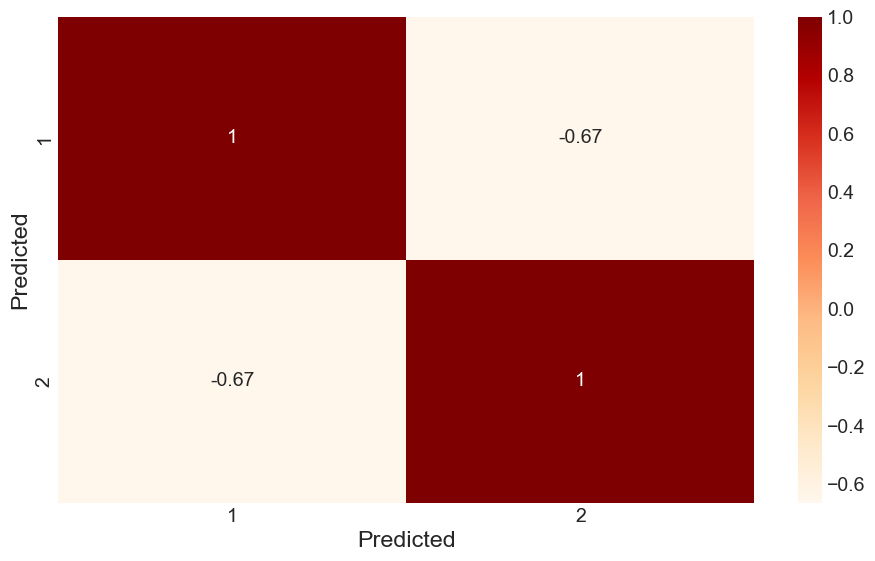

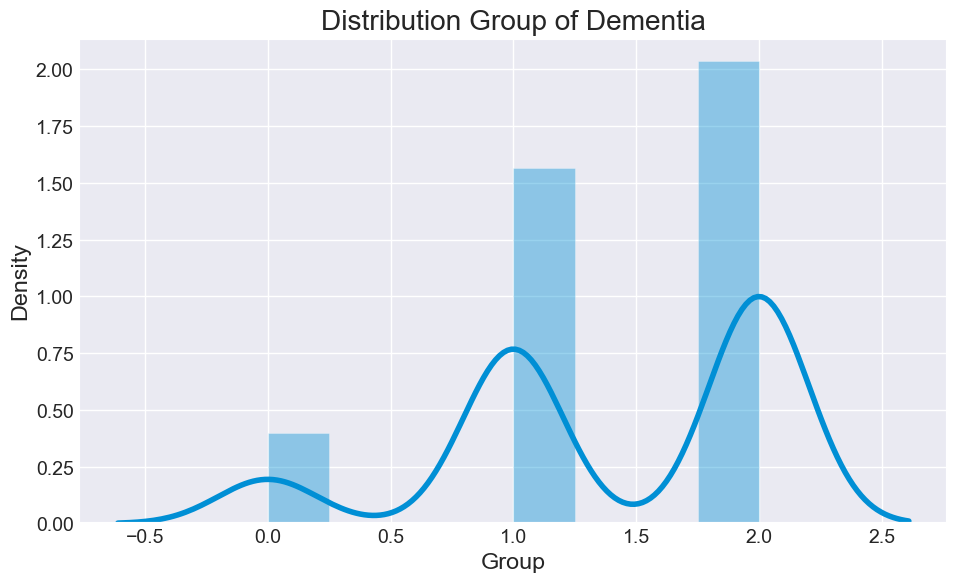

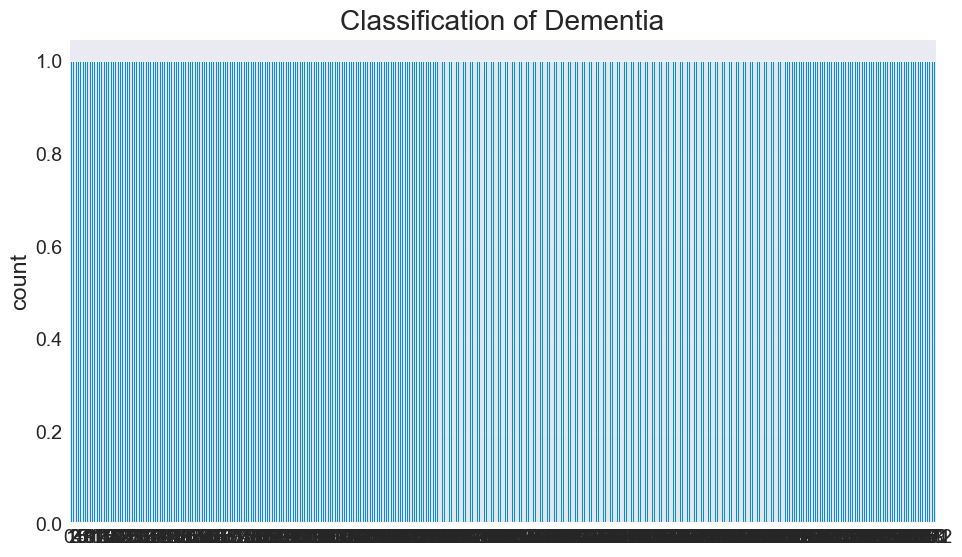

In [87]:





#matrix correlation
plt.figure(figsize = (10,6))
sns.heatmap(matrix.corr(), annot = True, cmap = 'OrRd')




#distribution
plt.figure(figsize = (10,6))
sns.distplot(df['Group'])
plt.title("Distribution Group of Dementia")
plt.show()





plt.figure(figsize = (10,6))
sns.countplot(df['Group'])
plt.title("Classification of Dementia")
plt.show()

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

clf = [ LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), SVC (random_state=42),
       RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42) ]
models = [ 'Logistic Regression', 'Tree', 'Support vector machine', 'RFC', 'Gradient boost' ]

for clf, model in zip(clf,models):
  clf.fit ( X_train, y_train )
  y_pred = clf.predict ( X_test )
  print ( f'Cross validation score of {model}: %.3f \n' %cross_val_score (clf, X_train, y_train, cv=5).mean() )

Cross validation score of Logistic Regression: 0.909 

Cross validation score of Tree: 0.849 

Cross validation score of Support vector machine: 0.896 

Cross validation score of RFC: 0.903 

Cross validation score of Gradient boost: 0.899 



# CUSTOM MODEL


In [96]:
X_test.shape

(75, 11)

In [97]:
y_test.shape


(75, 3)

In [89]:



from keras.utils import to_categorical
import numpy as np



y_train=to_categorical(y_train)
y_test = to_categorical(y_test)

In [90]:
import numpy as np
import pandas as pd
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K



from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [91]:

class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = tf.keras.Sequential()
        model.add(Dense(128, input_shape=(shape,)))  # Input layer with 128 units
#         model.add(activation='relu')
        model.add(Dense(64,activation='relu'))                        # Hidden layer with 64 units
#         model.add(activation='relu')
        model.add(Dense(32,activation='relu'))                         # Hidden layer with 32 units
#         model.add(activation='relu')
        model.add(Dense(3,activation='softmax'))                          # Output layer with 2 units
#         model.add(activation='softmax')

        return model

In [92]:
# Create an instance of the SimpleMLP model
model = SimpleMLP.build(shape=11, classes=3)

# Compile the model with loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Get a summary of the model's architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 11971 (46.76 KB)
Trainable params: 11971 (46.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100)
         



Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.1765 - accuracy: 0.9128
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9195
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9094
Epoch 4/100
10/10 [==============================] - 0s 830us/step - loss: 0.1603 - accuracy: 0.9161
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1589 - accuracy: 0.9161
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.9161
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1552 - accuracy: 0.9161
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.9161
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9161
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1577 - accuracy: 0.9195
Epoch 1